This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
# Ajout DC
# La ligne suivante est inutile dans Google Colab
# !pip install keras keras-hub --upgrade -q

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Image classification

### Introduction to ConvNets

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary(line_length=80)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)          │ (None, 28, 28, 1)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d (Conv2D)                   │ (None, 26, 26, 64)       │           640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)                 │ (None, 3, 3, 256)        │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d          │ (None, 256)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 10)               │         2,570 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8293 - loss: 0.5421
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0800
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0507
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0367
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9913 - loss: 0.0290


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0354
Test accuracy: 0.991


#### The convolution operation

##### Understanding border effects and padding

##### Understanding convolution strides

#### The max-pooling operation

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary(line_length=80)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)        │ (None, 28, 28, 1)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 26, 26, 64)       │           640 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)                 │ (None, 24, 24, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)                 │ (None, 22, 22, 256)      │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d_1        │ (None, 256)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         2,570 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training a ConvNet from scratch on a small dataset

#### The relevance of deep learning for small-data problems

#### Downloading the data

In [ ]:
import kagglehub

kagglehub.login()

In [ ]:
download_path = kagglehub.competition_download("dogs-vs-cats")

100%|██████████| 812M/812M [00:37<00:00, 22.5MB/s]

Extracting files...


In [ ]:
import zipfile

with zipfile.ZipFile(download_path + "/train.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#### Building your model

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary(line_length=80)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)        │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ rescaling (Rescaling)             │ (None, 180, 180, 3)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)                 │ (None, 178, 178, 32)     │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 89, 89, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)                 │ (None, 87, 87, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 43, 43, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)                 │ (None, 41, 41, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)    │ (None, 20, 20, 128)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)                 │ (None, 18, 18, 256)      │       295,168 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 9, 9, 256)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)                │ (None, 7, 7, 512)        │     1,180,160 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ global_average_pooling2d_2        │ (None, 512)              │             0 │
│ (GlobalAveragePooling2D)          │                          │               │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │           513 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

#### Data preprocessing

In [ ]:
from keras.utils import image_dataset_from_directory

batch_size = 64
image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=image_size, batch_size=batch_size
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=image_size, batch_size=batch_size
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=image_size, batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


##### Understanding TensorFlow Dataset objects

In [ ]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(
    lambda x: tf.reshape(x, (4, 4)),
    num_parallel_calls=8)
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


##### Fitting the model

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 180, 180, 3)
labels batch shape: (64,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.5076 - loss: 0.7335 - val_accuracy: 0.5200 - val_loss: 0.6924
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4785 - loss: 0.6936 - val_accuracy: 0.5010 - val_loss: 0.6914
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5076 - loss: 0.6882 - val_accuracy: 0.5710 - val_loss: 0.6803
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5612 - loss: 0.6854 - val_accuracy: 0.6260 - val_loss: 0.6426
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6079 - loss: 0.6638 - val_accuracy: 0.6740 - val_loss: 0.6094
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6477 - loss: 0.6362 - val_accuracy: 0.5640 - val_loss: 0.6583
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6401 - loss: 0.6334 - val_accuracy: 0.6410 - val_loss: 0.6188
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6866 - loss: 0.6106 - val_accuracy: 0.6580 -

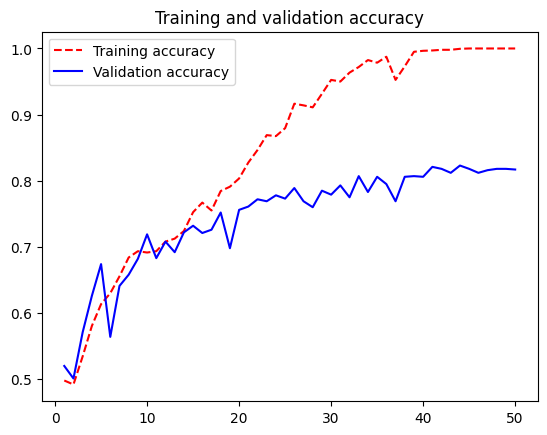

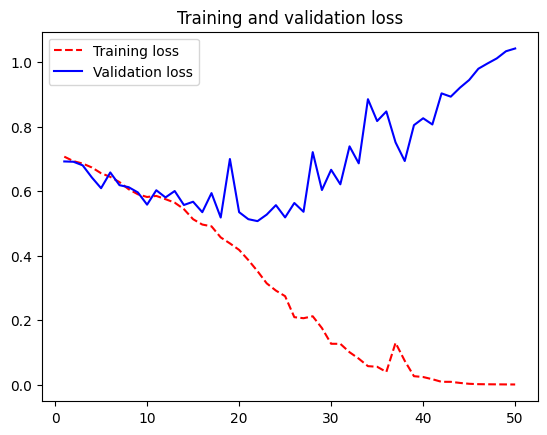

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7727 - loss: 0.5074
Test accuracy: 0.775


#### Using data augmentation

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
]

def data_augmentation(images, targets):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images, targets

augmented_train_dataset = train_dataset.map(
    data_augmentation, num_parallel_calls=8
)
augmented_train_dataset = augmented_train_dataset.prefetch(tf.data.AUTOTUNE)

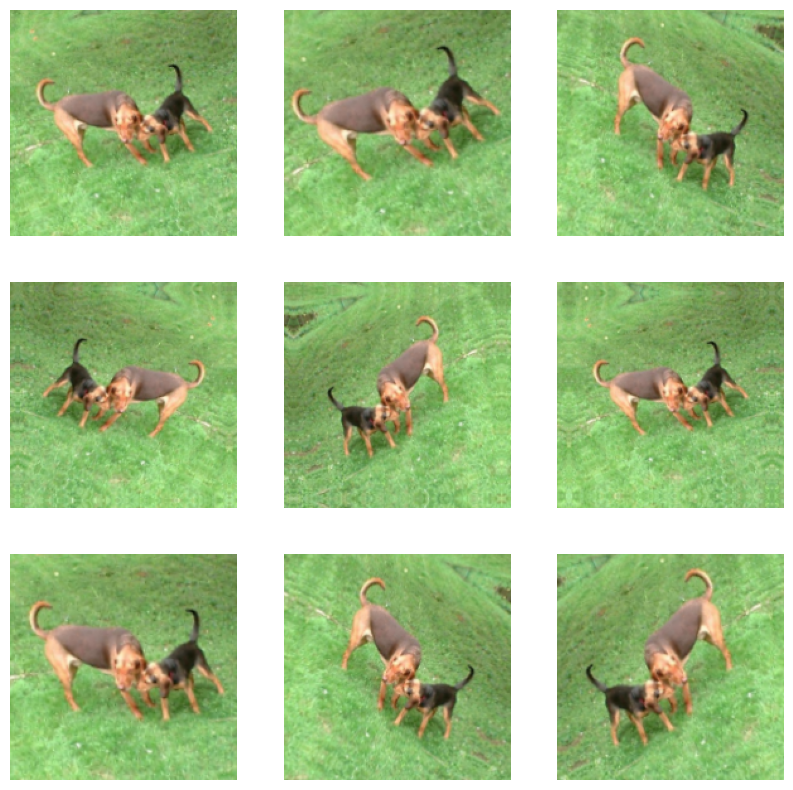

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, _ in train_dataset.take(1):
    image = image_batch[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image, _ = data_augmentation(image, None)
        augmented_image = keras.ops.convert_to_numpy(augmented_image)
        plt.imshow(augmented_image.astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.5015 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4996 - loss: 0.6933 - val_accuracy: 0.5010 - val_loss: 0.6916
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5432 - loss: 0.6911 - val_accuracy: 0.5070 - val_loss: 0.6929
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4902 - loss: 0.6934 - val_accuracy: 0.5710 - val_loss: 0.6826
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5251 - loss: 0.6996 - val_accuracy: 0.5850 - val_loss: 0.6735
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5916 - loss: 0.6775 - val_accuracy: 0.6220 - val_loss: 0.6634
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6043 - loss: 0.6657 - val_accuracy: 0.6000 - val_loss: 0.6512
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6456 - loss: 0.6526 - val_accuracy: 0

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8394 - loss: 0.4456
Test accuracy: 0.843


### Using a pretrained model

#### Feature extraction with a pretrained model

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset("xception_41_imagenet")

In [ ]:
preprocessor = keras_hub.layers.ImageConverter.from_preset(
    "xception_41_imagenet",
    image_size=(180, 180),
)

##### Fast feature extraction without data augmentation

In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = preprocessor(images)
        features = conv_base.predict(preprocessed_images, verbose=0)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 6, 6, 2048)

In [ ]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.GlobalAveragePooling2D()(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_features,
    train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks,
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9304 - loss: 0.1717 - val_accuracy: 0.9830 - val_loss: 0.0483
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9882 - loss: 0.0253 - val_accuracy: 0.9850 - val_loss: 0.0459
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0103 - val_accuracy: 0.9850 - val_loss: 0.0467
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0086 - val_accuracy: 0.9830 - val_loss: 0.0519
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 0.9860 - val_loss: 0.0546
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9880 - val_loss: 0.0540
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9810 - val_loss: 0.0713
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0086 - val_accuracy: 0.9840 - val_los

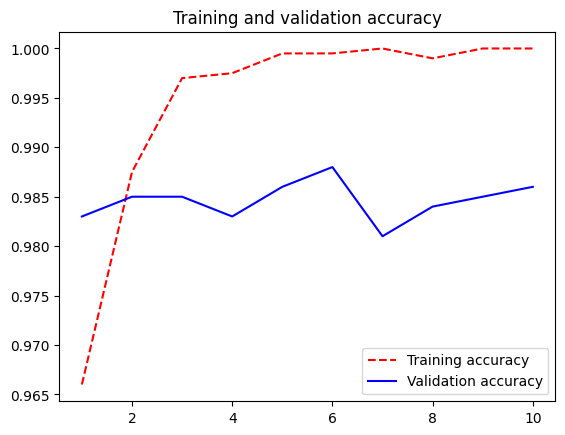

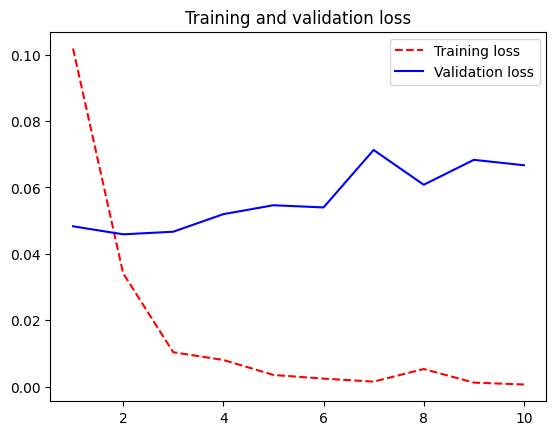

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9794 - loss: 0.0573
Test accuracy: 0.984


##### Feature extraction together with data augmentation

In [ ]:
import keras_hub

conv_base = keras_hub.models.Backbone.from_preset(
    "xception_41_imagenet",
    trainable=False,
)

In [ ]:
conv_base.trainable = True
len(conv_base.trainable_weights)

154

In [ ]:
conv_base.trainable = False
len(conv_base.trainable_weights)

0

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = preprocessor(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8494 - loss: 0.3505 - val_accuracy: 0.9850 - val_loss: 0.0531
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9620 - loss: 0.1250 - val_accuracy: 0.9850 - val_loss: 0.0428
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9729 - loss: 0.0603 - val_accuracy: 0.9700 - val_loss: 0.1118
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9485 - loss: 0.1622 - val_accuracy: 0.9880 - val_loss: 0.0514
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9738 - loss: 0.0705 - val_accuracy: 0.9860 - val_loss: 0.0564
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9664 - loss: 0.0777 - val_accuracy: 0.9880 - val_loss: 0.0526
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9715 - loss: 0.0729 - val_accuracy: 0.9830 - val_loss: 0.0520
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9802 - loss: 0.0498 - val_accuracy: 0.9770 - va

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.9775 - loss: 0.0625
Test accuracy: 0.979


#### Fine-tuning a pretrained model

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    augmented_train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 714ms/step - accuracy: 0.9853 - loss: 0.0348 - val_accuracy: 0.9840 - val_loss: 0.0595
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9820 - val_loss: 0.0587
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9922 - loss: 0.0250 - val_accuracy: 0.9810 - val_loss: 0.0579
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9869 - loss: 0.0309 - val_accuracy: 0.9820 - val_loss: 0.0582
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9820 - val_loss: 0.0580
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9820 - val_loss: 0.0576
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9908 - loss: 0.0257 - val_accuracy: 0.9810 - val_loss: 0.0567
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9908 - loss: 0.0201 - val_accuracy: 0.9820 -

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.9850 - loss: 0.0559
Test accuracy: 0.985
